### Reproduced CDS Influenza Surveillance Graphs in R


@author: Deep Narayan Mishra

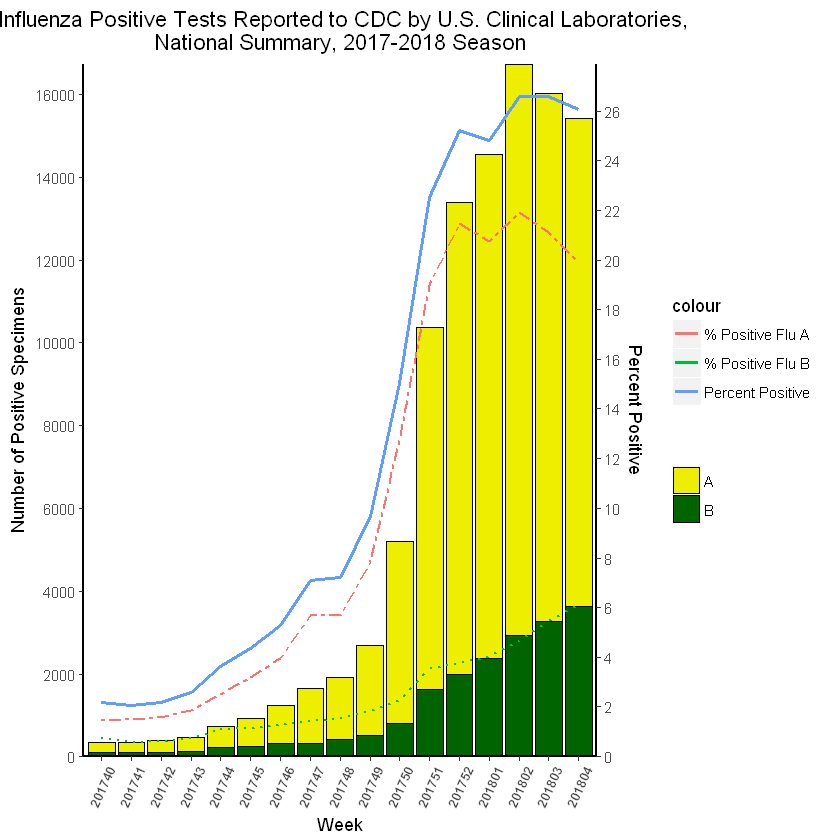

In [3]:
## CHART 1
## INFLUENZA POSITIVE TEST REPORTED ##

library(ggmap)
data <- read.csv("cdc_data/cdc_influenza_national_summary.csv", sep = ",")

colors = c('A' = 'yellow2', 'B'='darkgreen', '% Positive Flu A'='goldenrod', '% Positive Flu B'='springgreen','Percent Positive' = 'black')
ggplot(data) + 
    geom_bar(aes(x = factor(Week), y = Total.A+Total.B, fill = "A"), stat = "identity", color = "black", size = .5) + 
    geom_bar(aes(x = factor(Week), y = Total.B,fill="B"), stat = "identity", color = "black", size = .5) + 
    geom_line(aes(x = factor(Week), y = Percent.Positive.A * 600, color="% Positive Flu A"),stat = "identity", group = 1, linetype = 6, size = .75) + 
    geom_line(aes(x = factor(Week), y = Percent.Positive.B * 600, color="% Positive Flu B" ),stat = "identity", group = 1, linetype = 3, size = .75) + 
    geom_line(aes(x = factor(Week), y = X..Positive * 600,color="Percent Positive"),stat = "identity", group = 1, size = 1) + 
    labs(x = "Week", y = "Number of Positive Specimens") + 
    ggtitle("IInfluenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2017-2018 Season") + 
    scale_y_continuous(breaks = seq(0, 18000, by = 2000), sec.axis = sec_axis(~./600, breaks = seq(0, 30, by = 2), name = "Percent Positive"), expand=c(0,0)) +
    scale_fill_manual(name = "", values = colors) + 
    theme(axis.text.x = element_text(vjust = .5, face="bold", size = 8, angle=65), plot.title = element_text(hjust = 0.5), axis.line = element_line(color = "black", size = .8), panel.background = element_blank())

Warning message:
"package 'reshape2' was built under R version 3.4.3"

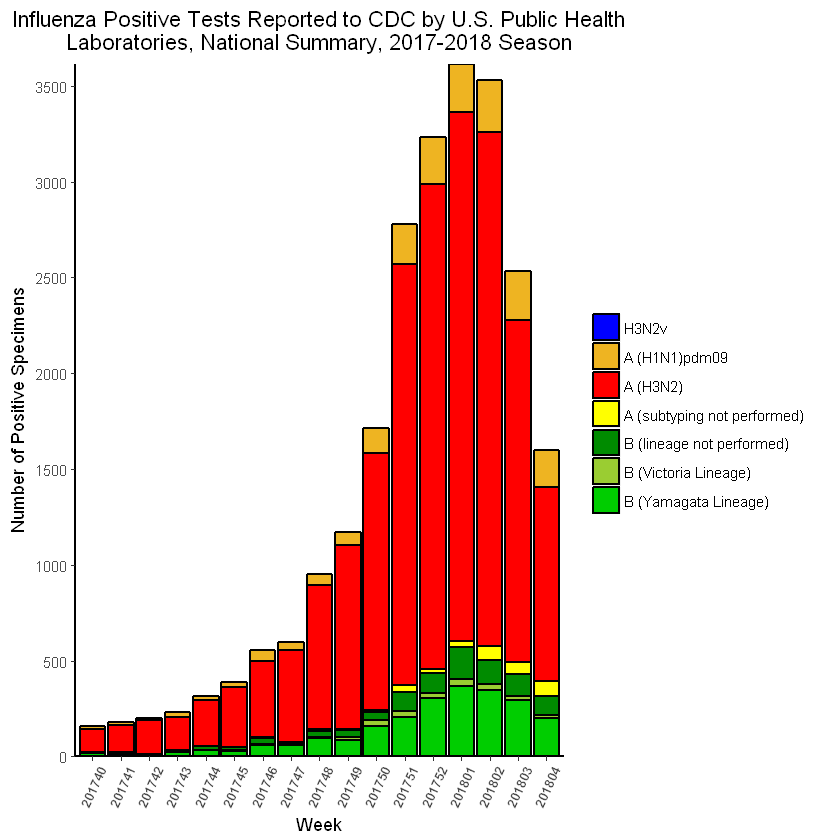

In [5]:
##CHART 2

## INFLUENGA POSITIVE TESTS REPORTED TO CDC BY US PUBLIC HEALTH CHART ##
###################################################################

library(ggplot2)
library(reshape2)

data <- read.csv("cdc_data/cdc_influenza_positive_tested.csv" , sep = ",")[,0:8]
data_melted <- melt(data,id.vars = "Week")

p1 = ggplot(data_melted, aes(x = factor(Week), y = value, fill = variable) ) + 
  geom_bar(stat = "identity", color = "black", size = .65)+ xlab("Week") + ylab("Number of Positive Specimens") +
scale_fill_manual(values=c("blue","goldenrod2", "red1", "yellow", "green4", "yellowgreen", "green3"),
                   labels=c("H3N2v", "A (H1N1)pdm09", "A (H3N2)", "A (subtyping not performed)","B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)")) + 

scale_y_continuous(breaks = seq(0, 4000, by = 500), expand=c(0,0)) +

    theme(axis.text.x = element_text(face="bold", size = 8, angle=65, vjust = .5), plot.title = element_text(hjust = 0.5), panel.background = element_blank(), axis.line = element_line(color = "black", size = .8)) +
  guides(fill=guide_legend(title=NULL)) + 
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2017-2018 Season")

p1

Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

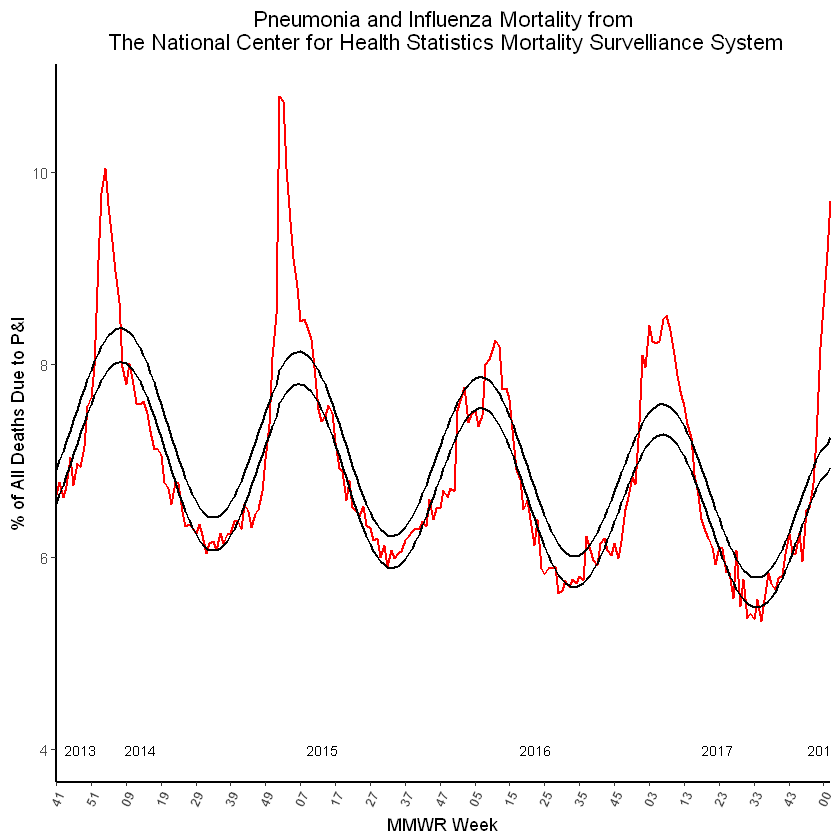

In [4]:
##CHART 3

## PNEUMONIA AND INFLUENZA MORTALITY SURVELLIANCE CHART  ##
##########################################################

mortality <- read.csv("cdc_data/cdc_influenza_mortality.csv")[210:433,]

line1 <- mortality$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza
line2 <- mortality$Threshold
line3 <- mortality$Expected

mortality$year_and_week <- paste(mortality$Year, mortality$Week)
mortality$year_week_and_date <- as.Date(paste(mortality$year_and_week, 1), "%Y %U %u")

ggplot(mortality) + 
    geom_line(aes(y = mortality$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza, x = year_week_and_date), , color="red",stat = "identity", group = 1, size = .75) + 
    geom_line(aes(y = Threshold, x = year_week_and_date), color="black",stat = "identity", group = 1, size = .75) + 
    geom_line(aes(y = Expected, x = year_week_and_date), color="black",stat = "identity", group = 1, size = .75) +
    scale_x_date(date_breaks = "10 week", date_labels = "%U", expand=c(0,0)) +
    labs(x = "MMWR Week", y = "% of All Deaths Due to P&I") + 
    #annotating a value based on date value so that level year appears
    annotate("text",label="2013",x=as.Date("2013-12-01"), y=4, size=3) + annotate("text", label="2014", x=as.Date("2014-04-01"), y=4, size=3) +
    annotate("text",label="2015",x=as.Date("2015-04-01"), y=4, size=3) +  annotate("text", label="2016", x=as.Date("2016-06-01"), y=4, size=3) +
    annotate("text",label="2017",x=as.Date("2017-06-01"), y=4, size=3) + annotate("text", label="2018", x=as.Date("2018-01-01"), y=4, size=3) +
    ggtitle("Pneumonia and Influenza Mortality from\n The National Center for Health Statistics Mortality Survelliance System") + 
    theme(axis.text.x = element_text(face="bold", size = 8, angle=65, vjust = .5), plot.title = element_text(hjust = 0.5), panel.background = element_blank(), axis.line = element_line(color = "black", size = .8))
    
#warning due to data window and axis level

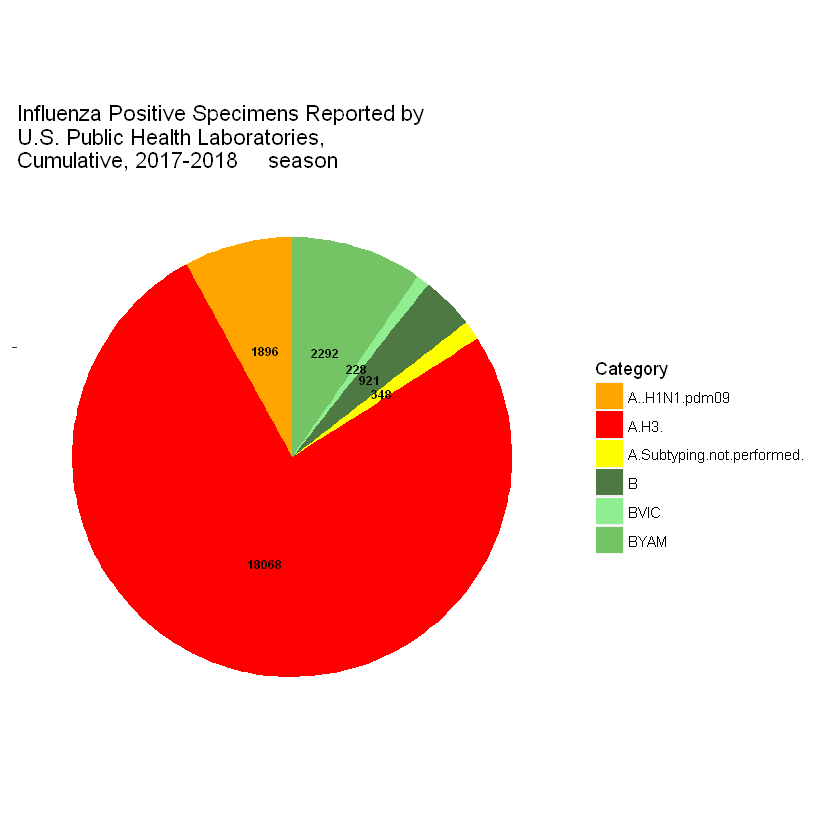

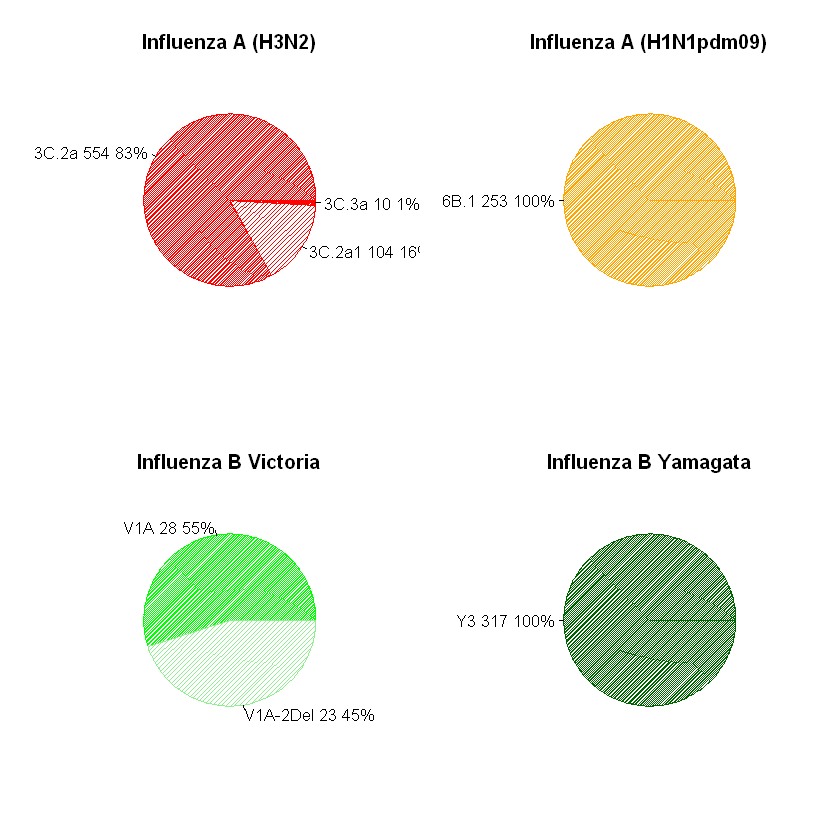

In [6]:
##CHART 4

## INFLUENZA POSITIVE SPECIMENS REPORTED BY US PUBLIC HEALTH CHART  ##
######################################################################

library(ggplot2)
library(reshape2)

data <- read.csv("cdc_data/cdc_influenza_positive_tested.csv" , sep = ",")
data_melted <- melt(data,id.vars = "Week")
data_melted <- aggregate(data_melted$value, by=list(Category=data_melted$variable), FUN=sum)
data_melted <- data_melted[c(3,2,4,6,7,5),]
data_melted$Category <- as.character(data_melted$Category)
pie_chart <-ggplot(data_melted, aes(x="", y=x, fill=Category))+ geom_bar(width = 1, stat = "identity") + 
    coord_polar("y", start=0) + theme(axis.text.x=element_blank(),panel.background = element_blank(),axis.title.x = element_blank(),axis.title.y = element_blank()) +
    scale_fill_manual(values=c("orange", "red", "yellow", "#4F7942", "#90EE90", "#74C365")) + ggtitle    ("Influenza Positive Specimens Reported by \nU.S. Public Health Laboratories,\nCumulative, 2017-2018     season")+
    geom_text(aes(label = x), position = position_stack(vjust = 0.5), size = 2.5, fontface='bold') 

pie_chart



pie_subchart_data <- read.csv("cdc_data/cdc_influenza_genetic_pie_chart.csv" , sep = ",")
pie_subchart_data <- subset(pie_subchart_data, Number != 0)
pie_subchart_data$numeric_percentage_for_chart <- as.numeric(sub("%", "",pie_subchart_data$X..of..Sub.type.Total,fixed=TRUE)) 
pie_subchart_data['labels_col'] <- (paste(pie_subchart_data$Genetic_Group, pie_subchart_data$Number, pie_subchart_data$X..of..Sub.type.Total, sep = ' '))


pie_subchart_data_1 <- subset(pie_subchart_data, X.Sub.type == "H3")
pie_subchart_data_2 <- subset(pie_subchart_data, X.Sub.type == "H1pdm09")
pie_subchart_data_3 <- subset(pie_subchart_data, X.Sub.type == "B/Victoria")
pie_subchart_data_4 <- subset(pie_subchart_data, X.Sub.type == "B/Yamagata")

par(mfrow=c(2,2))
pie_subchart_1 <- pie(pie_subchart_data_1$numeric_percentage_for_chart, labels = pie_subchart_data_1$labels_col, main="Influenza A (H3N2)", col = c("red","red","red"),density=c(100,40,500))
pie_subchart_2 <- pie(pie_subchart_data_2$numeric_percentage_for_chart, labels = pie_subchart_data_2$labels_col, main="Influenza A (H1N1pdm09)", col = c("orange"), density = 100)
pie_subchart_3 <- pie(pie_subchart_data_3$numeric_percentage_for_chart, labels = pie_subchart_data_3$labels_col, main="Influenza B Victoria", col = c("green","light green"),density=c(100,40))
pie_subchart_4 <- pie(pie_subchart_data_4$numeric_percentage_for_chart, labels = pie_subchart_data_4$labels_col, main="Influenza B Yamagata", col = c("dark green"), density = 100)

Warning message:
"package 'fiftystater' was built under R version 3.4.3"

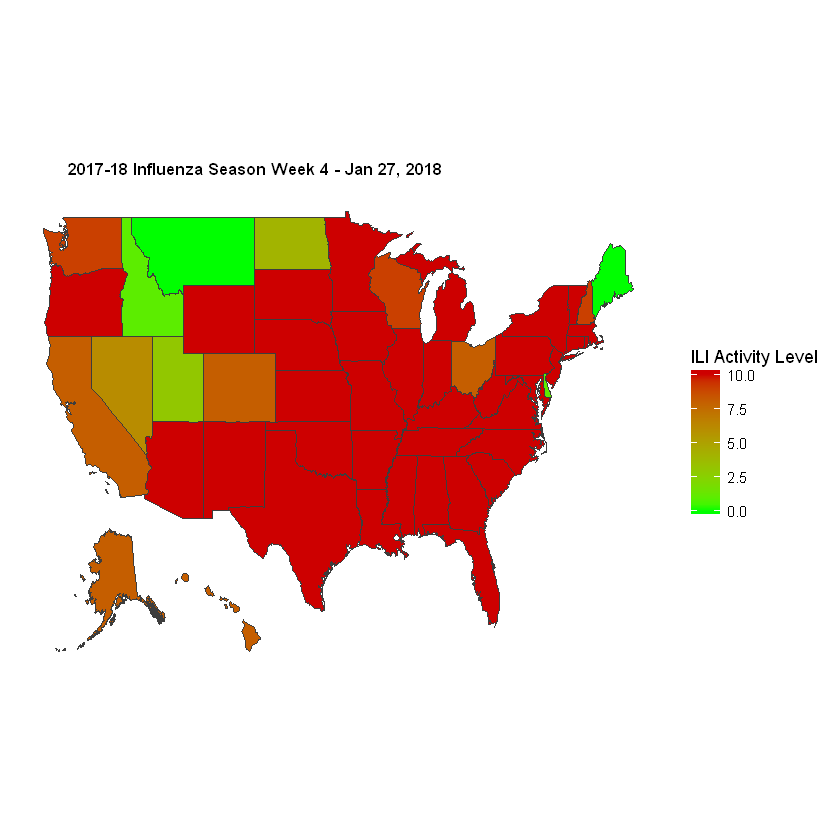

In [7]:
##CHART 5

## ILI HEAT MAP OF USA CHART  ##
################################

library(ggmap)
library(fiftystater)

#load cdc data
cdc_data <- read.csv("cdc_data/cdc_influenza_like_illness.csv")
cdc_data$activityval <- as.numeric(gsub("Level ","",cdc_data$ACTIVITY.LEVEL))
cdc_data$state <- tolower(cdc_data$STATENAME)

#load state data now
data("fifty_states")


plot1 <- ggplot(cdc_data, aes(map_id = state))
plot1 + geom_map( aes( fill = activityval ), map = fifty_states, color="grey24", size=.1) +
       expand_limits(x = fifty_states$long, y = fifty_states$lat) +
       scale_fill_gradient("ILI Activity Level", low="green", high="red3") +
       ggtitle("2017-18 Influenza Season Week 4 - Jan 27, 2018") + 
       coord_fixed(ratio = 5/3) +
       theme(
             plot.title = element_text(size=10, hjust = 0.2, face="bold"),
             panel.background = element_blank(),
             axis.text = element_blank(),
             axis.ticks = element_blank(),
             axis.title.x = element_blank(),
             axis.title.y = element_blank())